In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import tqdm

from polyas_urn_model import urn_simulation
from multiurn_model import multi_urn_simulation

SIM_CNT = 100
rounds = 10_000
#simple = np.zeros(rounds)

probs = np.arange(0.1, 1.1, 0.1)
multis = {p: np.zeros(rounds) for p in probs}
pair_multis = {p: np.zeros(rounds) for p in probs}

for _ in tqdm.tqdm(range(SIM_CNT)):
    card_sizes=[random.randint(1,5) for _ in range(rounds)]
    
    base_pool_size = 100
    new_element_increment=10
    new_opportunity_increment=20
    
    # result = urn_simulation(
    #     rounds=rounds,
    #     base_pool_size=base_pool_size,
    #     new_element_increment=new_element_increment,
    #     new_opportunity_increment=new_opportunity_increment,
    #     card_sizes=card_sizes,
    #     return_urns=True,
    # )
    for p in probs:
        m_result = multi_urn_simulation(
            rounds=rounds,
            base_pool_count=10,
            base_pool_size=base_pool_size,
            new_element_increment=new_element_increment,
            new_opportunity_increment=new_opportunity_increment,
            swap_probability=p,
            card_sizes=card_sizes,
            return_urns=True,
            with_tqdm=False,
        )
      
        #simple += np.array(result['element_counts'])
        multis[p] += np.array(m_result['element_counts'])
        pair_multis[p] += np.array(m_result['pairs_counts'])


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:34<00:00,  1.55s/it]


Text(0.5, 0, 'base_pool_size = 100 RHO=10 NU=20')

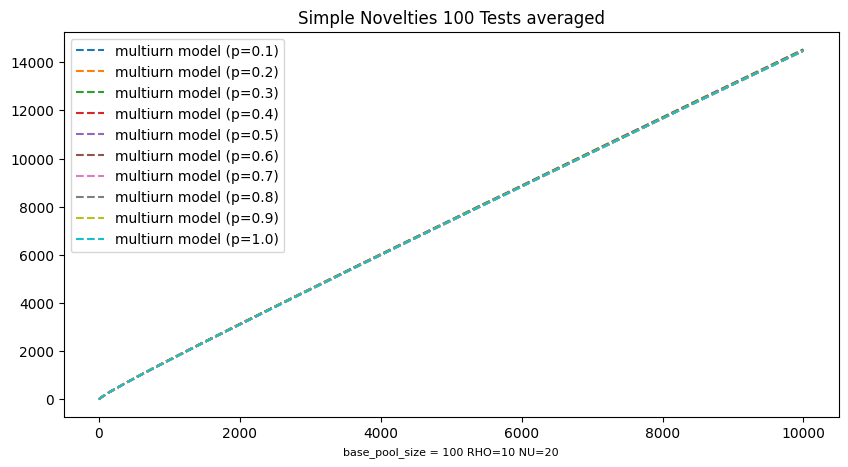

In [88]:
#plt.plot(list(range(len(simple))), simple / SIM_CNT, "b--", label="simple urn model")
fig = plt.figure(figsize=(10, 5))
for p in probs:
    plt.plot(list(range(len(multis[p]))), multis[p] / SIM_CNT, "--",markerfacecolor='none', label=f"multiurn model (p={round(p, 6)})")
plt.legend()
plt.title(f"Simple Novelties {SIM_CNT} Tests averaged")
plt.xlabel(
    f"base_pool_size = {base_pool_size} RHO={new_element_increment} NU={new_opportunity_increment}",
    fontsize=8)

Text(0.5, 0, 'base_pool_size = 100 new_element_increment=10 new_opportunity_increment=20')

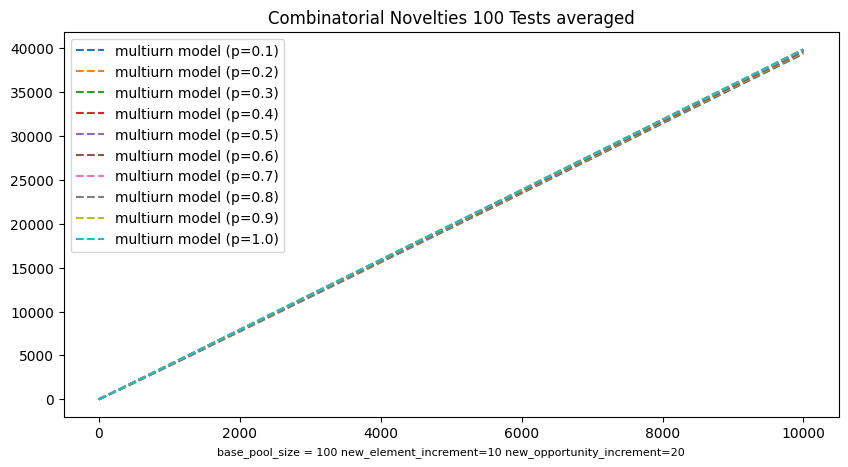

In [89]:
#plt.plot(list(range(len(simple))), simple / SIM_CNT, "b--", label="simple urn model")
fig = plt.figure(figsize=(10, 5))
for p in probs:
    plt.plot(list(range(len(pair_multis[p]))), pair_multis[p] / SIM_CNT, "--",markerfacecolor='none', label=f"multiurn model (p={round(p, 6)})")
plt.legend()
plt.legend()
plt.title(f"Combinatorial Novelties {SIM_CNT} Tests averaged")
plt.xlabel(
    f"base_pool_size = {base_pool_size} new_element_increment={new_element_increment} new_opportunity_increment={new_opportunity_increment}",
    fontsize=8)

# restarting the investigation

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:06<00:00, 143243.34it/s]


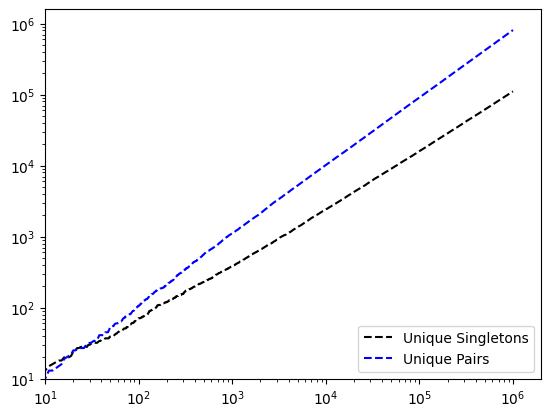

In [52]:
rounds = 1_000_000
card_sizes = [random.randint(1,3) for _ in range(rounds)]
result = urn_simulation(
        rounds=rounds,
        base_pool_size=100,
        new_element_increment=10,
        new_opportunity_increment=10,
        card_sizes=card_sizes,
        return_urns=True,
    )
assert len(result['element_counts']) == len(result['pairs_counts'])

xs = range(len(result['element_counts']))
plt.plot(xs, result['element_counts'], 'k--', label="Unique Singletons")
plt.plot(xs, result['pairs_counts'], 'b--', label="Unique Pairs")
plt.loglog()
plt.xlim(10)
plt.ylim(10)
plt.legend(loc="lower right")

In [39]:
m_result = multi_urn_simulation(
            rounds=rounds,
            base_pool_count=10,
            base_pool_size=10,
            new_element_increment=5,
            new_opportunity_increment=5,
            swap_probability=0.1,
            card_sizes=card_sizes,
            return_urns=True,
            with_tqdm=False,
        )

In [42]:
len(m_result['element_counts'])

1000000

[]

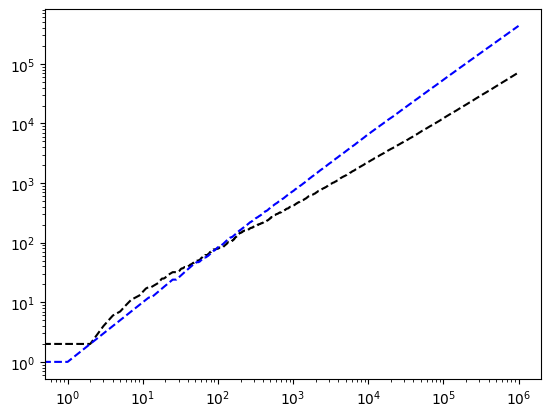

In [47]:
xs = range(len(m_result['element_counts']))
plt.plot(xs, m_result['element_counts'], 'k--')
plt.plot(xs, m_result['pairs_counts'], 'b--')
plt.loglog()

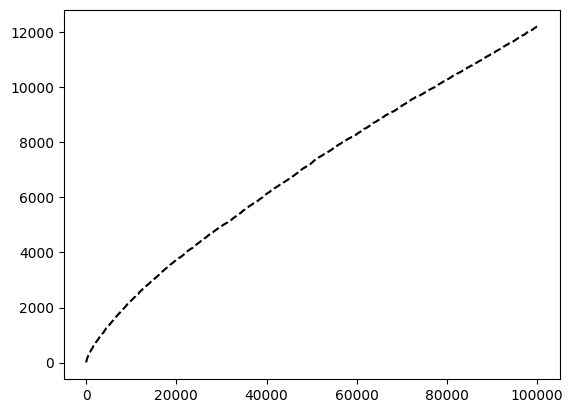

In [46]:
xs = range(len(m_result['element_counts']))
plt.plot(xs[:100_000], m_result['element_counts'][:100_000], 'k--')